In [9]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join("..")))

from src.utils.pricing_market_logic_multiproduct import (
    get_monopoly_prices,
    get_nash_prices,
    get_profits,
    get_quantities,
)
from src.utils.utils import (
    plot_duopoly_results_from_df,
)

In [10]:
N_FIRMS = 2
MARGINAL_COST = 1.0
ALPHA = 1

a0 = 0.0
a = tuple([2.0 for _ in range(N_FIRMS)])
mu = 0.25
alpha = tuple([ALPHA for _ in range(N_FIRMS)])
c = tuple([MARGINAL_COST for _ in range(N_FIRMS)])
beta = 100
sigma = 0.25 # critical: this disables nesting → standard logit
group_idxs = tuple([i for i in range(1, N_FIRMS+1)])
WILLIWGNES_TO_PAY = 4.51 * ALPHA

monopoly_prices = get_monopoly_prices(
    a0=a0,
    a=a,
    mu=mu,
    alpha=alpha,
    c=c,
    multiplier=beta,
    sigma=sigma,
    group_idxs=group_idxs,
)

monopoly_q = get_quantities(
    p=tuple(monopoly_prices),
    a0=a0,
    a=a,
    mu=mu,
    alpha=alpha,
    multiplier=beta,
    sigma=sigma,
    group_idxs=group_idxs,
)

monopoly_profits = get_profits(
    p=tuple(monopoly_prices),
    c=c,
    a0=a0,
    a=a,
    mu=mu,
    alpha=alpha,
    multiplier=beta,
    sigma=sigma,
    group_idxs=group_idxs,
)

nash_prices = get_nash_prices(
    a0=a0,
    a=a,
    mu=mu,
    alpha=alpha,
    multiplier=beta,
    sigma=sigma,
    group_idxs=group_idxs,
    c=c,
)
nash_q = get_quantities(
    p=tuple(nash_prices),
    a0=a0,
    a=a,
    mu=mu,
    alpha=alpha,
    multiplier=beta,
    sigma=sigma,
    group_idxs=group_idxs,
)
nash_profits = get_profits(
    p=tuple(nash_prices),
    c=c,
    a0=a0,
    a=a,
    mu=mu,
    alpha=alpha,
    multiplier=beta,
    sigma=sigma,
    group_idxs=group_idxs,
)

nash_quantities = get_quantities(
    p=tuple(nash_prices),
    a0=a0,
    a=a,
    mu=mu,
    alpha=alpha,
    multiplier=beta,
    sigma=sigma,
    group_idxs=group_idxs,
)
print(f"Monopoly prices: {monopoly_prices} | Nash prices: {nash_prices}")
print(f"Monopoly profits: {monopoly_profits} | Monopoly quantities: {monopoly_q}")
print(f"Nash profits: {nash_profits} | Nash quantities: {nash_quantities}")

Monopoly prices: [1.8859367839279824, 1.8859367841816808] | Nash prices: [1.467837558344815, 1.4678375571705864]
Monopoly profits: [31.796841418045727, 31.796841394883895] | Monopoly quantities: [35.89064366090311, 35.89064362448151]
Nash profits: [21.783662839265784, 21.783662886906832] | Nash quantities: [46.56244983052504, 46.56245004922491]


In [11]:
import json
import numpy as np
import pandas as pd
def make_df_from_results(results_path):
   summarized_results = []
   for prompt in os.listdir(results_path):
        prmt = 1 if 'P1' in prompt else 2
        if '.' in prompt:
            continue

        with open(f"{results_path}/{prompt}/metadata.json", 'r') as f:
               meta = json.load(f)
        alpha = meta['environment']['environment_params']['alpha'][0]
        with open(f"{results_path}/{prompt}/results.json", 'r') as f:
            results = json.load(f)
        
        p1 = []
        p2 = []
        pi_1 = []
        pi_2 = []
        for round in range(251, 300+1):
            if f"{round}" not in results['Firm A'] or f"{round}" not in results['Firm B']:
                continue
            p1.append(results['Firm A'][f"{round}"]['chosen_price'])
            p2.append(results['Firm B'][f"{round}"]['chosen_price'])
            pi_1.append(results['Firm A'][f"{round}"]['profit'])
            pi_2.append(results['Firm B'][f"{round}"]['profit'])
        p1 = np.mean(p1)/alpha
        p2 = np.mean(p2)/alpha
        pi_1 = np.mean(pi_1)
        pi_2 = np.mean(pi_2)
        pi_delta = pi_1 - pi_2

        summarized_results.append({
            "prompt": prmt,
            "alpha": alpha,
            "p1": p1,
            "p2": p2,
            "pi_1": pi_1,
            "pi_2": pi_2,
            "pi_delta": pi_delta
        })

   return pd.DataFrame(summarized_results)

/Users/jr/Library/CloudStorage/GoogleDrive-julian.romero@bse.eu/My Drive/03_term/master_thesis/algorithmic_pricing_llms/.venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3859: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jr/Library/CloudStorage/GoogleDrive-julian.romero@bse.eu/My Drive/03_term/master_thesis/algorithmic_pricing_llms/.venv/lib/python3.11/site-packages/numpy/_core/_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


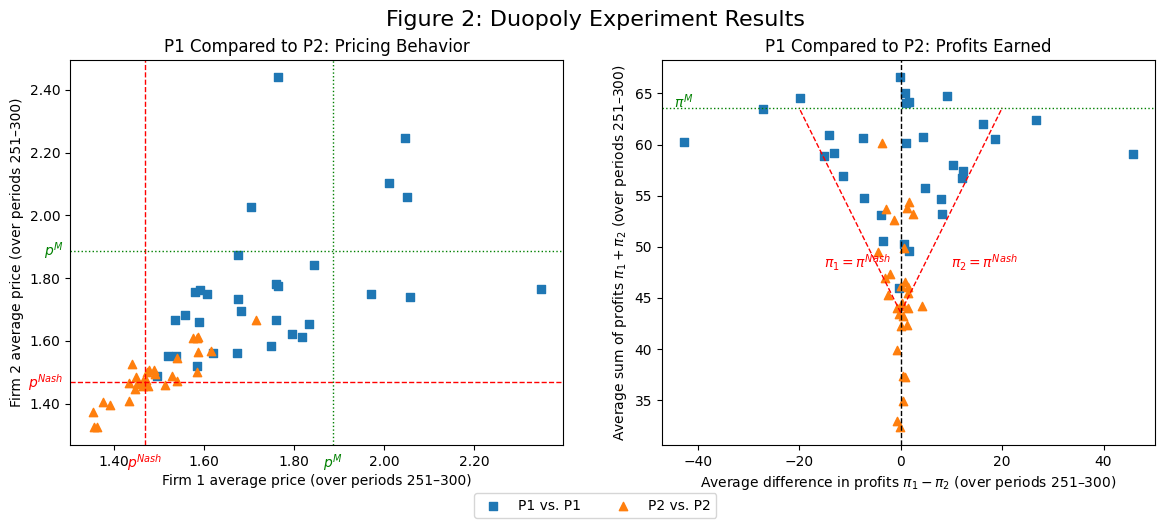

In [12]:

df_res = make_df_from_results(results_path='experiments_runs/2_agents')
plot_duopoly_results_from_df(df_res, 
                            p_nash=nash_prices[0], 
                            p_m=monopoly_prices[0], 
                            pi_nash=nash_profits[0], 
                            pi_m=monopoly_profits[0], 
                            title="Figure 2: Duopoly Experiment Results",
                            save_path="./experiments_runs/2_agents/duopoly_results.svg"
)